### EDA and Visualization on Pokemon dataset

### EDA - Exploratory Data Analysis

In [4]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [6]:
# Importing Data

pokemons = pd.read_csv('pokemon.csv')

In [8]:
#EDA on pokemons data

# random observations from our dataset.
pokemons.sample(7)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
593,533,Gurdurr,Fighting,NaN,405,85,105,85,40,50,40,5,False
286,263,Zigzagoon,Normal,NaN,240,38,30,41,30,41,60,3,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
214,199,Slowking,Water,Psychic,490,95,75,80,100,110,30,2,False
298,275,Shiftry,Grass,Dark,480,90,100,60,90,60,80,3,False


In [11]:
pokemons.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [12]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [13]:
# since 'Type 2' is almost half filled with NaN, we will drop the column 'Type 2'
# and rename 'Type 1' as just 'Type'

del pokemons['Type 2']
pokemons.rename(columns = {'Type 1' : 'Type'}, inplace = True)

In [14]:
pokemons.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [15]:
# for statistics

pokemons.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [16]:
len(pokemons.Name.unique())
# we got 800 different pokemons

800

In [18]:
pokemons[pokemons.duplicated()]
# we don't have duplicated values in our data frame

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [19]:
len(pokemons['Type'].unique())
# There are 18 different types of pokemons

18

In [20]:
# how many pokemons are in each Type?

pokemons['Type'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type, dtype: int64

In [21]:
# How many pokemons are in each generatin?

pokemons['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

Text(0.5,1,'Number of pokemons grouped by Generaion')

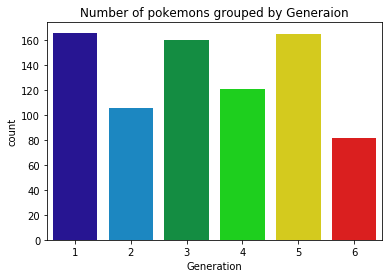

In [22]:
sns.countplot(x = 'Generation', data = pokemons, palette = 'nipy_spectral')
plt.title('Number of pokemons grouped by Generaion')

In [25]:
# pokemons in each type

#pokemons['Type'].value_counts()
pokemons.Type.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type, dtype: int64

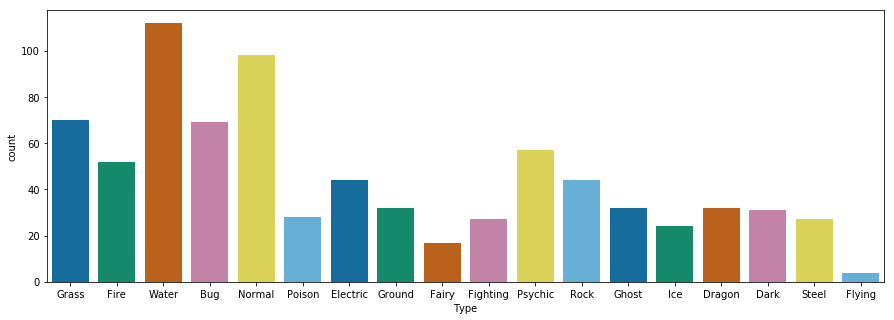

In [28]:
plt.figure(figsize = (15, 5))
sns.countplot(pokemons.Type, palette = 'colorblind')

Text(0.5,1,'Boxplots for stats')

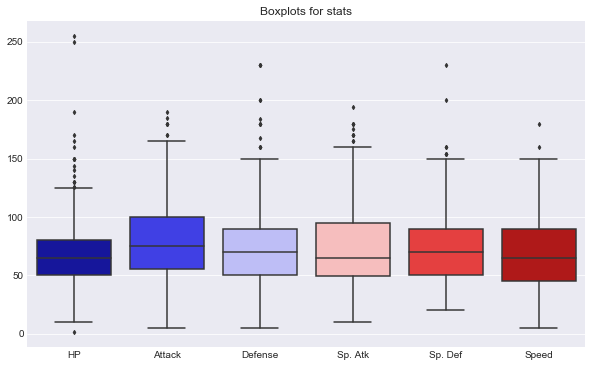

In [30]:
# checking the distribution of stats with boxplot & violinplot:

sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
sns.boxplot(data = pokemons.drop(['#', 'Total', 'Generation', 'Legendary'], axis = 1), fliersize = 3, palette = 'seismic')
plt.title('Boxplots for stats')

# we have some outlier for each stat

Text(0.5,1,'Violinplot for stats')

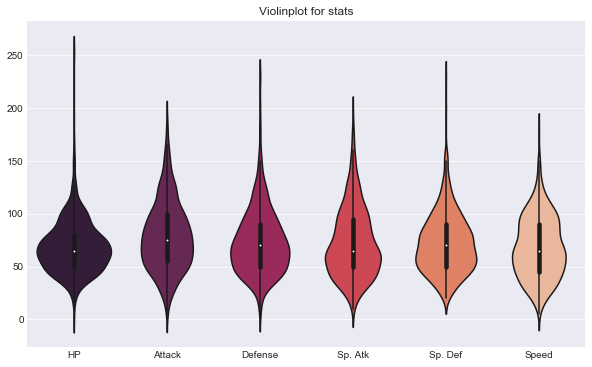

In [32]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = pokemons.drop(['#', 'Total', 'Generation', 'Legendary'], axis = 1), palette = 'rocket')
plt.title('Violinplot for stats')

#the stas have a similar distribution

In [33]:
# let's visualize the pokemons grouped by type

pokemons.groupby('Type').sum()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type,,,,,,,,,,
Bug,23080,26146,3925,4897,4880,3717,4471,4256,222,0.0
Dark,14302,13818,2071,2740,2177,2314,2155,2361,125,2.0
Dragon,15180,17617,2666,3588,2764,3099,2843,2657,124,12.0
Electric,15994,19510,2631,3040,2917,3961,3243,3718,144,4.0
Fairy,7642,7024,1260,1046,1117,1335,1440,826,70,1.0
Fighting,9824,11244,1886,2613,1780,1434,1747,1784,91,0.0
Fire,17025,23820,3635,4408,3524,4627,3755,3871,167,5.0
Flying,2711,1940,283,315,265,377,290,410,22,2.0
Ghost,15568,14066,2062,2361,2598,2539,2447,2059,134,2.0


In [34]:
pokemons.groupby('Type').sum().HP

Type
Bug         3925
Dark        2071
Dragon      2666
Electric    2631
Fairy       1260
Fighting    1886
Fire        3635
Flying       283
Ghost       2062
Grass       4709
Ground      2361
Ice         1728
Normal      7573
Poison      1883
Psychic     4026
Rock        2876
Steel       1761
Water       8071
Name: HP, dtype: int64

In [35]:
pokemons['Type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [36]:
# Type of pokemons and order them alphabetically in a list

list_types = pokemons['Type'].unique().tolist() # convert the array of types into a list
list_types.sort()  # sorting the list of strings alphabetically 
list_types

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

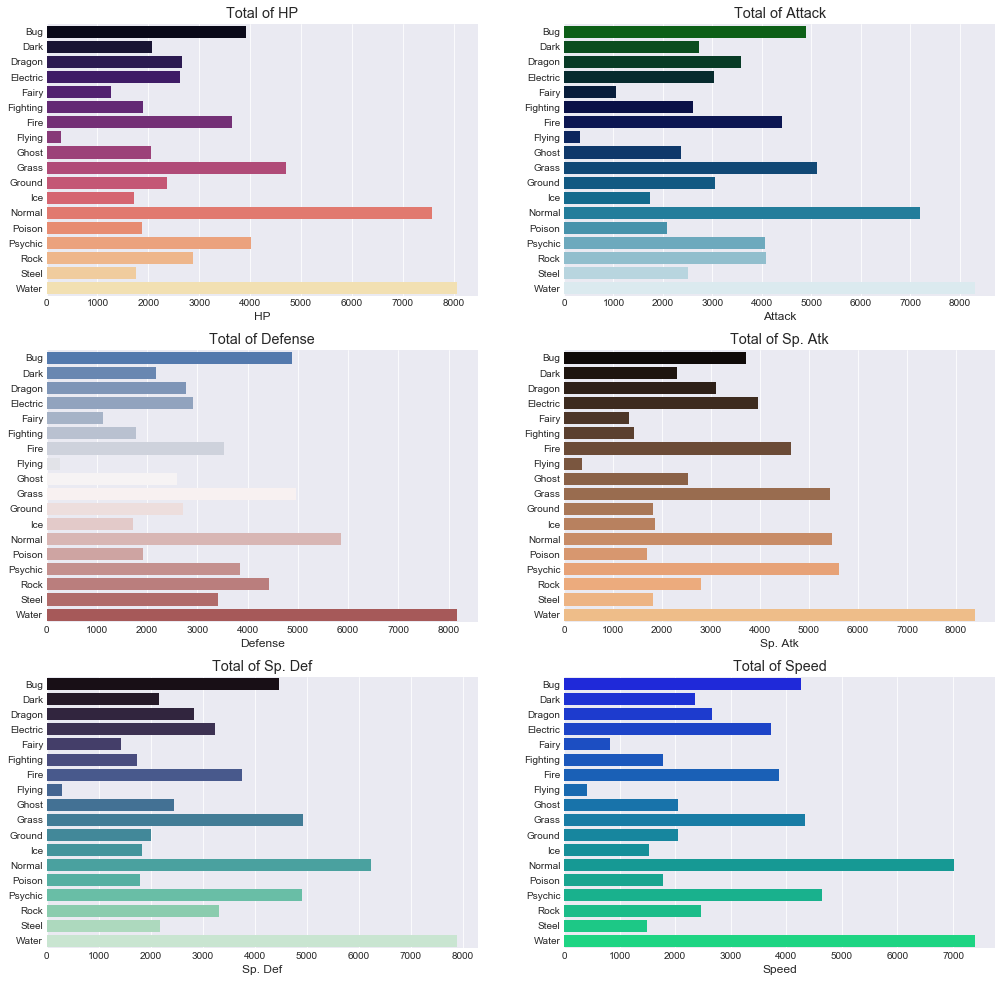

In [39]:
# plotting the tatal of stats for each type of pokemon:

plt.style.use('ggplot')
plt.style.use('seaborn-darkgrid')

stats = pokemons[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
k = 1
m = 0
palette = ['magma', 'ocean', 'vlag', 'copper', 'mako', 'winter']
plt.figure(figsize = (17, 17))
for i in stats:
    plt.subplot(3, 2, k)
    k = k + 1
    sns.barplot(x = pokemons.groupby('Type').sum()[i], y = list_types, palette = palette[m])
    m = m + 1
    plt.title(str('Total of ' +i))

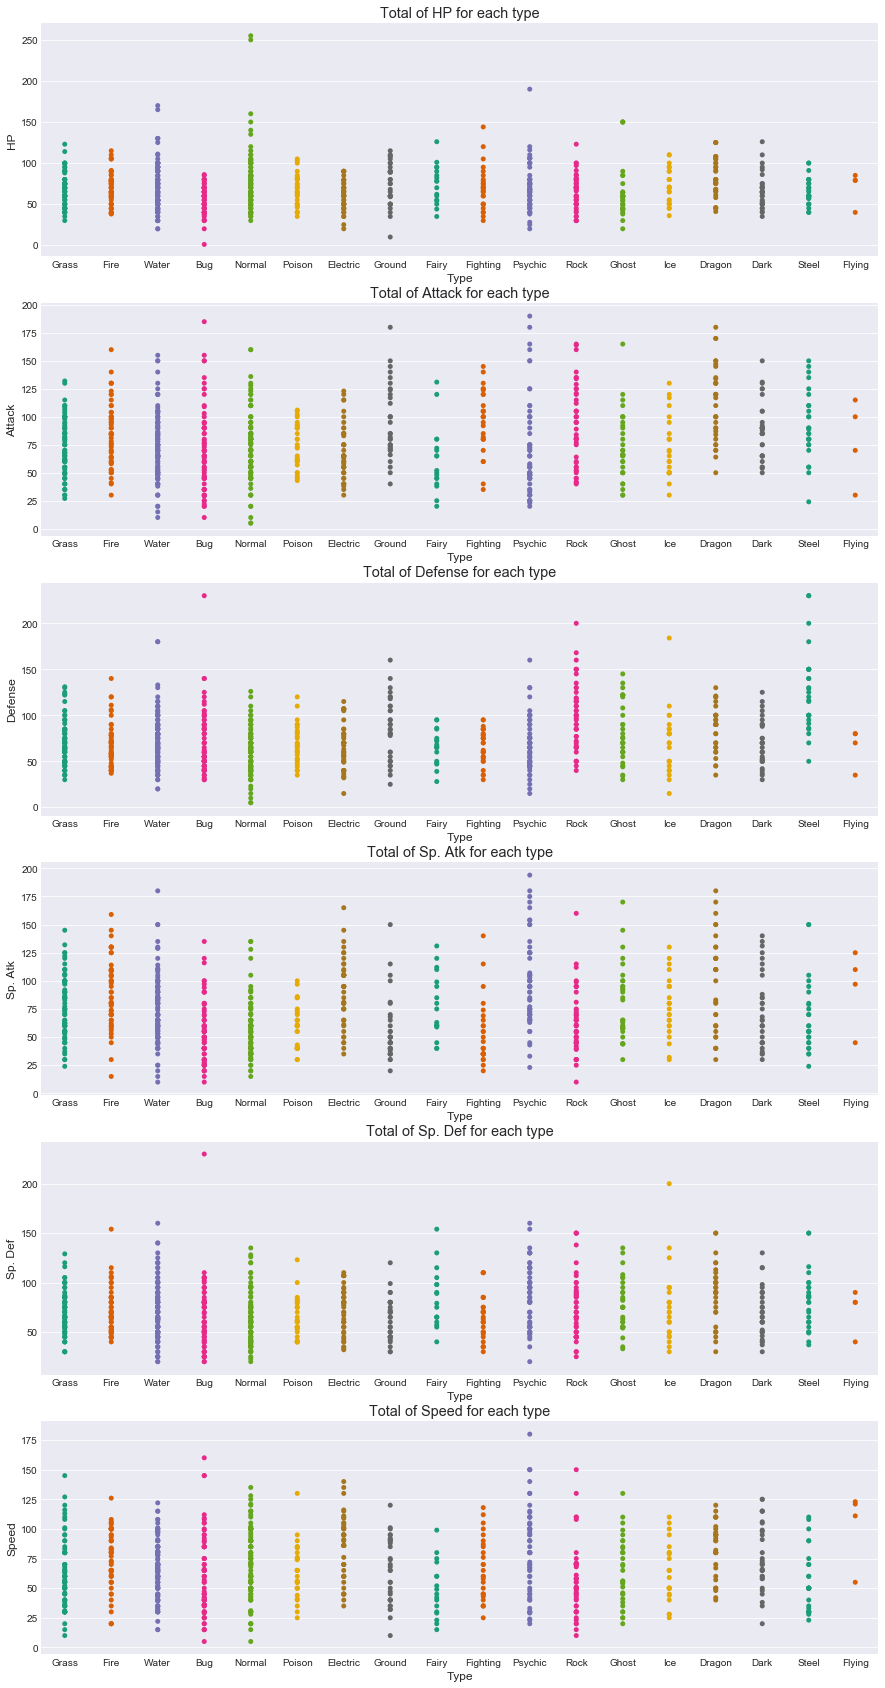

In [41]:
# Time for some swarmplots!

k = 1
m = 0
plt.figure(figsize = (15,30))
for i in stats:
    plt.subplot(6, 1, k)
    k = k + 1
    sns.stripplot(x = pokemons.Type, y = pokemons[i], palette = 'Dark2')
    plt.title(str('Total of ')+i + str(' for each type'))

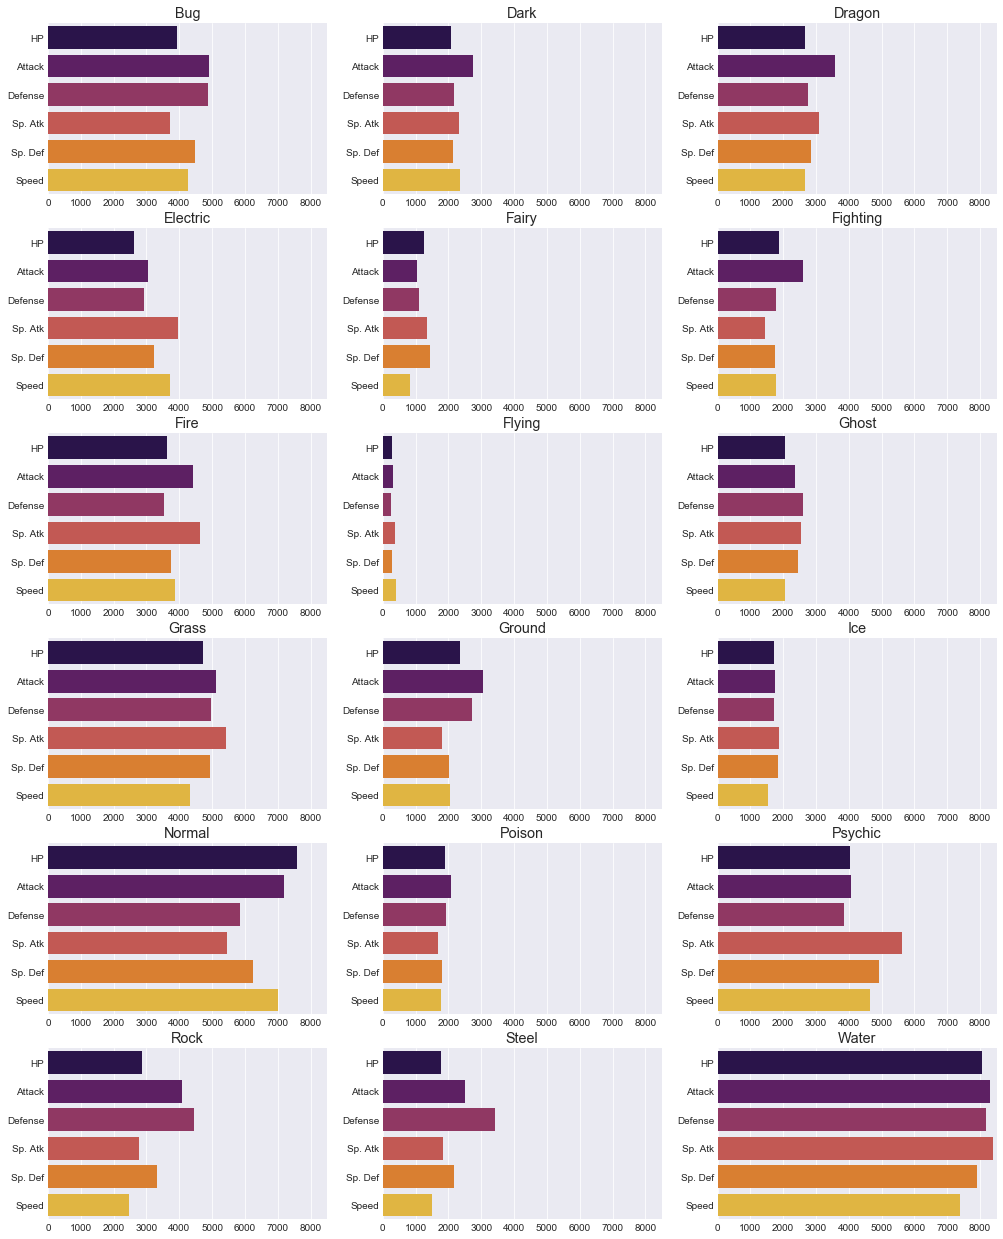

In [47]:
# let's draw plots for each type separately

k = 1
plt.figure(figsize = (17,22))
for i in list_types:
    plt.subplot(6, 3, k)
    k = k + 1
    sns.barplot(x = pokemons[pokemons.Type == i].sum().drop(['#', 'Name', 'Type', 'Generation', 
                                                             'Legendary', 'Total']).values, 
                y = pokemons[pokemons.Type == i].sum().drop(['#', 'Name', 'Type', 'Generation',
                                                            'Legendary', 'Total']).index, palette = 'inferno')
    plt.title(i)
    plt.xlim(0, 8500)

In [51]:
pok_melt = pd.melt(pokemons, id_vars = ['Name', 'Type', 'Legendary'], value_vars = ['HP', 'Defense', 'Attack', 
                                                                                    'Sp. Atk', 'Sp. Def', 'Speed'])
pok_melt.head()

,Name,Type,Legendary,variable,value
0,Bulbasaur,Grass,False,HP,45
1,Ivysaur,Grass,False,HP,60
2,Venusaur,Grass,False,HP,80
3,VenusaurMega Venusaur,Grass,False,HP,80
4,Charmander,Fire,False,HP,39


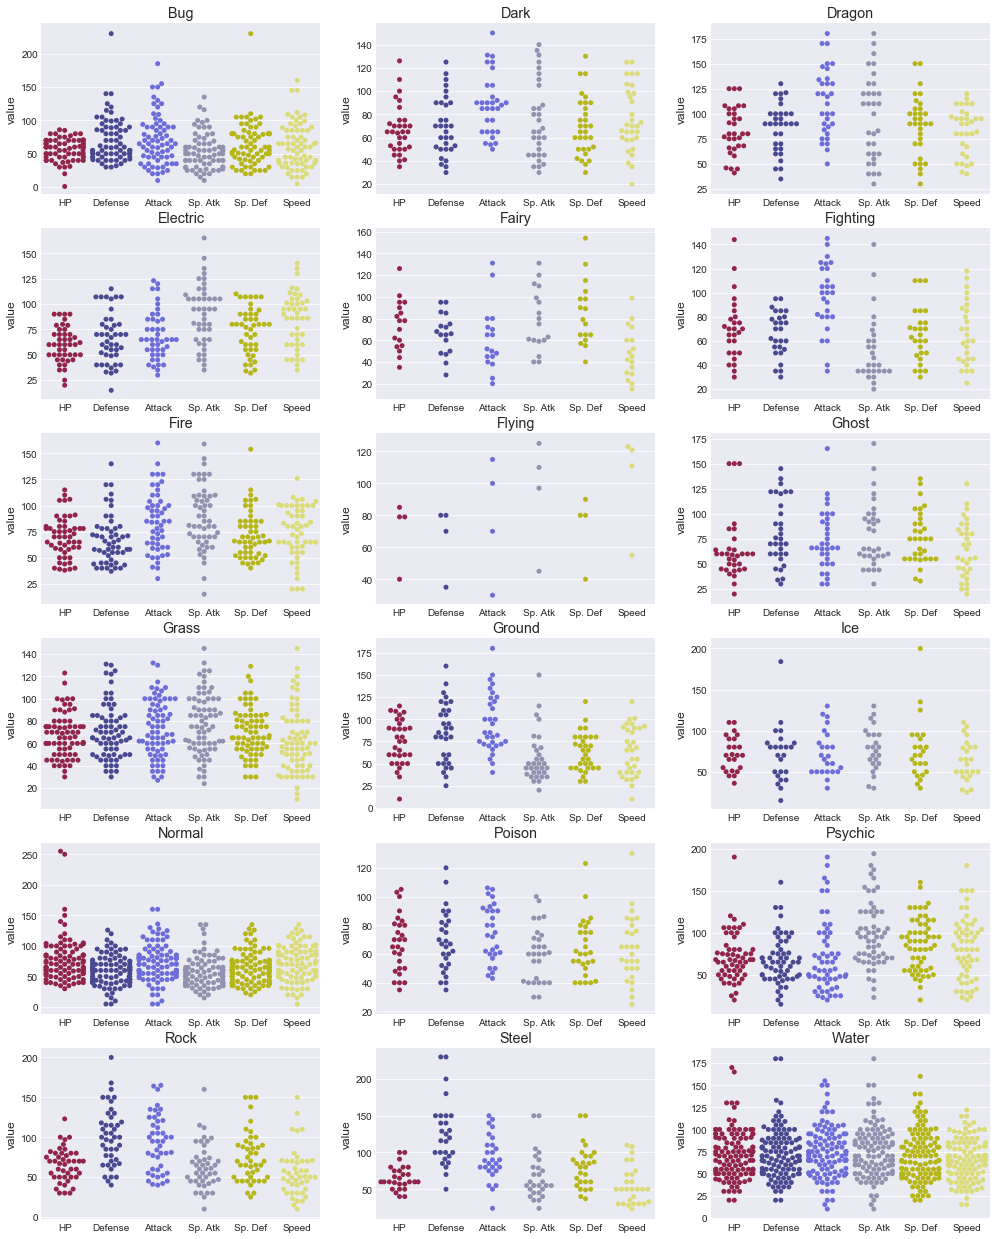

In [52]:
plt.figure(figsize = (17, 22))
k = 1
for i in list_types:
    plt.subplot(6, 3, k)
    k = k + 1
    sns.swarmplot(x = pok_melt.variable, y = pok_melt[pok_melt.Type==i].value, palette = 'gist_stern')
    plt.title(i)
    plt.xlabel('')

In [54]:
# what if we calculate the mean for each stat and we plot it, In this case the small number of some pokemons of 
# different types will not affect the analysis

# MEAN of stats grouped by pokemon's type

df = pd.DataFrame()
for i in stats:
    df[i] = pokemons.groupby('Type').describe()[i]['mean']
df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


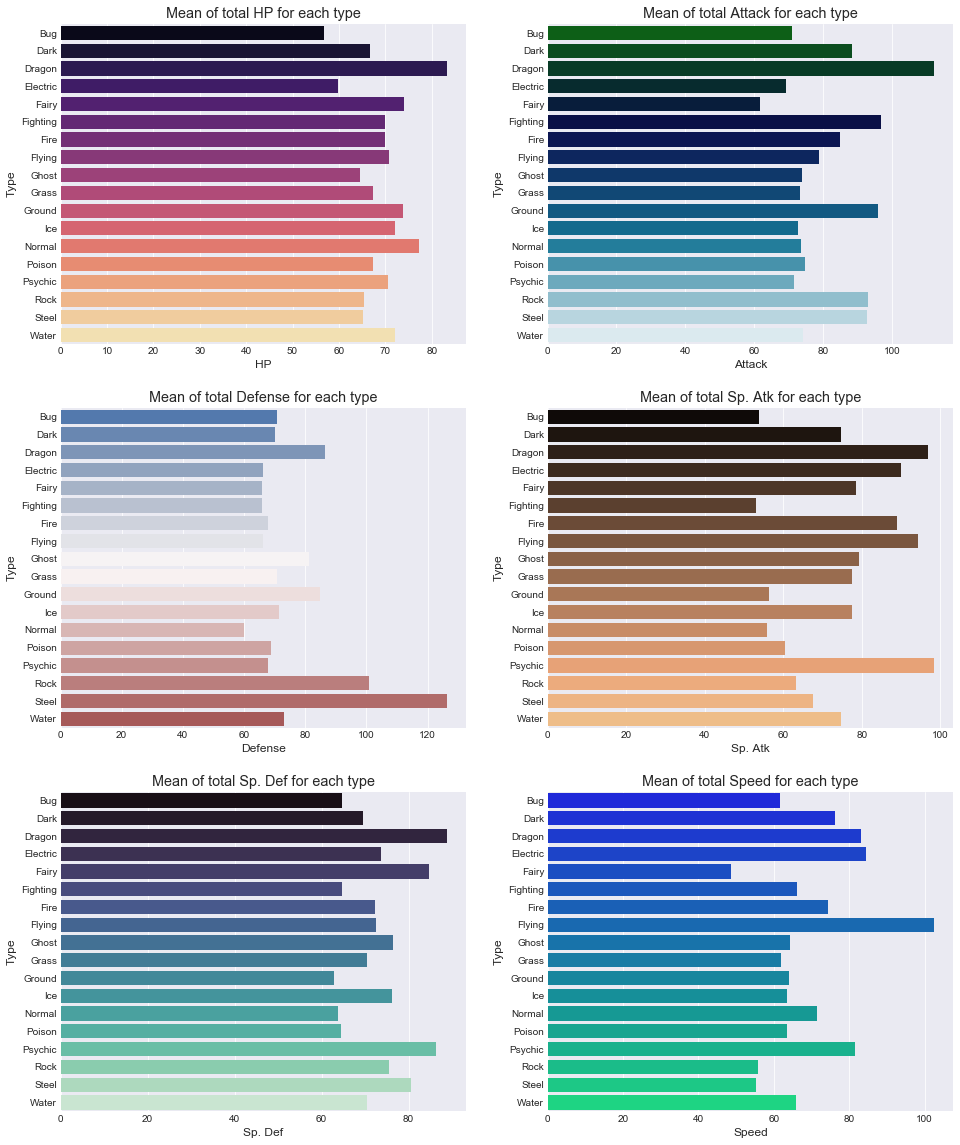

In [56]:
plt.figure(figsize = (16, 20))
k = 1
m = 0
for i in stats:
    plt.subplot(3, 2, k)
    k = k + 1
    sns.barplot(x = df[i], y = df.index, palette = palette[m])
    m = m+1
    plt.title(str('Mean of total ') + i +str(' for each type'))
    plt.xlabel(i)

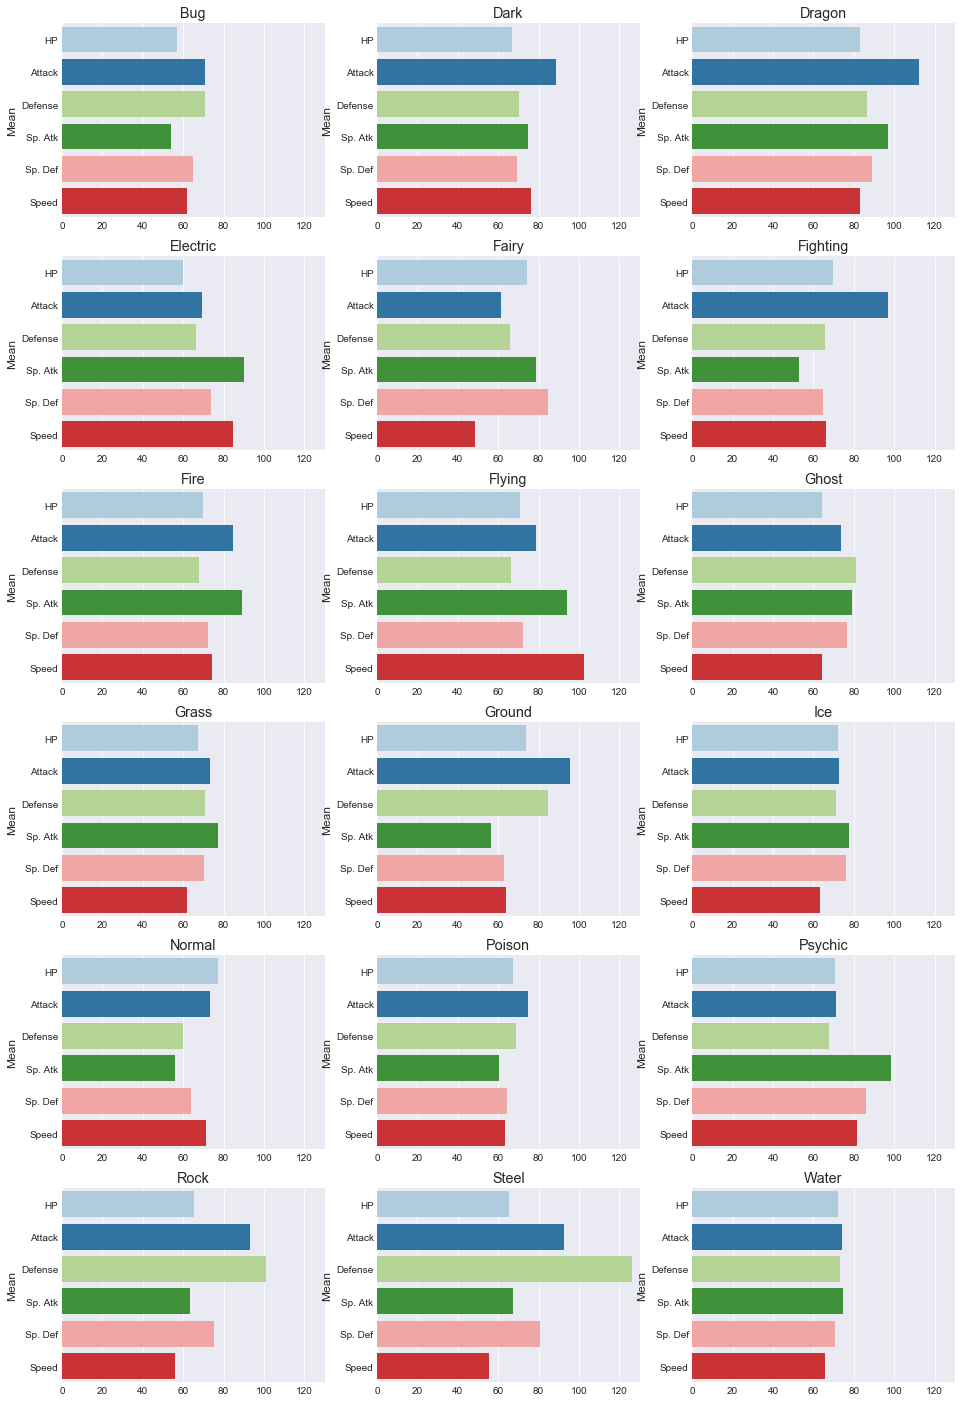

In [57]:
k = 1
plt.figure(figsize = (16, 25))
for i in list_types:
    plt.subplot(6, 3, k)
    k = k + 1
    sns.barplot(x = df.loc[i, :].values, y=df.loc[i, :].index, palette = 'Paired')
    plt.title(i)
    plt.xlim(0, 130)
    plt.ylabel('Mean')

Text(0.5,1,'Total of all stats for each type of pokemons')

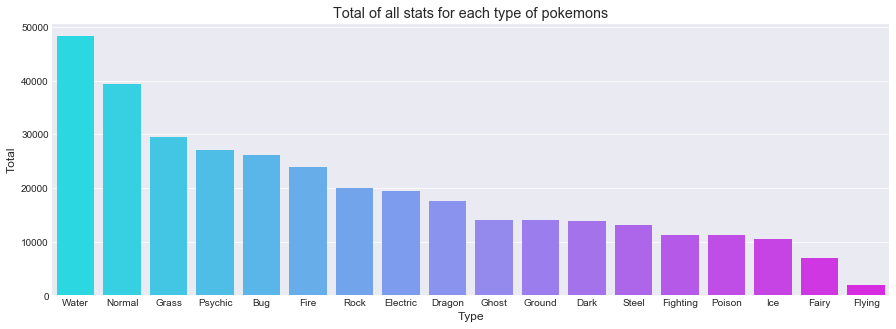

In [61]:
# Copmaring initial total stas and the mean of tatal stats

plt.figure(figsize = (15, 5))
sns.barplot(x = pokemons.groupby('Type').sum().Total.sort_values(ascending = False).index,
            y = pokemons.groupby('Type').sum().Total.sort_values(ascending = False), palette = 'cool')
plt.title('Total of all stats for each type of pokemons')

# top 3 Water, Noraml and Grass

Text(0.5,1,'Mean of the total of all stats for each type of pokemons')

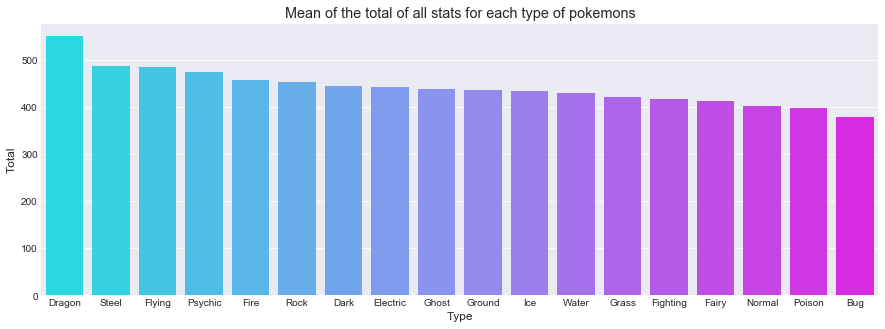

In [60]:
# Now mean

plt.figure(figsize = (15, 5))
sns.barplot(x = pokemons.groupby('Type').mean().Total.sort_values(ascending = False).index,
            y = pokemons.groupby('Type').mean().Total.sort_values(ascending = False), palette = 'cool')
plt.title('Mean of the total of all stats for each type of pokemons')

# top 3 Dragon, Steel and Flying 
# plotting the mean of the values shows greater insight of data 

In [62]:
# Whata is the best stats for each type?

best_stats = []
for i in list_types:
    best_stats.append(df.loc[i, :].sort_values(ascending = False).index[0])

In [65]:
m = 0
for k in best_stats:
    print('Best stat of type ', list_types[m], ' is ', k)
    m = m + 1

Best stat of type  Bug  is  Attack
Best stat of type  Dark  is  Attack
Best stat of type  Dragon  is  Attack
Best stat of type  Electric  is  Sp. Atk
Best stat of type  Fairy  is  Sp. Def
Best stat of type  Fighting  is  Attack
Best stat of type  Fire  is  Sp. Atk
Best stat of type  Flying  is  Speed
Best stat of type  Ghost  is  Defense
Best stat of type  Grass  is  Sp. Atk
Best stat of type  Ground  is  Attack
Best stat of type  Ice  is  Sp. Atk
Best stat of type  Normal  is  HP
Best stat of type  Poison  is  Attack
Best stat of type  Psychic  is  Sp. Atk
Best stat of type  Rock  is  Defense
Best stat of type  Steel  is  Defense
Best stat of type  Water  is  Sp. Atk


In [66]:
# list al the Mega pokemons

pokemons[pokemons.Name.str.contains('Mega')]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,590,105,125,100,60,100,100,1,False


In [67]:
# Lets fix the Mega pokemons names i.e VenusaurMega Venusaur -> Mega Venusaur

mega_pokemons = ['Mega' + poke.split('Mega')[1] for poke in pokemons[pokemons.Name.str.contains('Mega')].Name]
mega_pokemons

['Mega Venusaur',
 'Mega Charizard X',
 'Mega Charizard Y',
 'Mega Blastoise',
 'Mega Beedrill',
 'Mega Pidgeot',
 'Mega Alakazam',
 'Mega Slowbro',
 'Mega Gengar',
 'Mega Kangaskhan',
 'Mega Pinsir',
 'Mega Gyarados',
 'Mega Aerodactyl',
 'Mega Mewtwo X',
 'Mega Mewtwo Y',
 'Meganium',
 'Mega Ampharos',
 'Mega Steelix',
 'Mega Scizor',
 'Mega Heracross',
 'Mega Houndoom',
 'Mega Tyranitar',
 'Mega Sceptile',
 'Mega Blaziken',
 'Mega Swampert',
 'Mega Gardevoir',
 'Mega Sableye',
 'Mega Mawile',
 'Mega Aggron',
 'Mega Medicham',
 'Mega Manectric',
 'Mega Sharpedo',
 'Mega Camerupt',
 'Mega Altaria',
 'Mega Banette',
 'Mega Absol',
 'Mega Glalie',
 'Mega Salamence',
 'Mega Metagross',
 'Mega Latias',
 'Mega Latios',
 'Mega Rayquaza',
 'Mega Lopunny',
 'Mega Garchomp',
 'Mega Lucario',
 'Mega Abomasnow',
 'Mega Gallade',
 'Mega Audino',
 'Mega Diancie']

In [69]:
pokemons = pokemons.replace(to_replace = pokemons[pokemons.Name.str.contains('Mega')].Name.values, value = mega_pokemons)
pokemons.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [71]:
# Which is the best pokemons for each type? based on each state

for n in list_types:
    print(str('TYPE ')+n.upper())
    for i in stats:
        name = pokemons[(pokemons.Type == n)].sort_values(by = i, ascending = False).Name.values[0]
        print(str('Best ')+i+(' pokemons is ')+name)
    print('******************************************')

TYPE BUG
Best HP pokemons is Yanmega
Best Attack pokemons is Mega Heracross
Best Defense pokemons is Shuckle
Best Sp. Atk pokemons is Volcarona
Best Sp. Def pokemons is Shuckle
Best Speed pokemons is Ninjask
******************************************
TYPE DARK
Best HP pokemons is Yveltal
Best Attack pokemons is Mega Absol
Best Defense pokemons is Mega Sableye
Best Sp. Atk pokemons is Mega Houndoom
Best Sp. Def pokemons is Umbreon
Best Speed pokemons is Darkrai
******************************************
TYPE DRAGON
Best HP pokemons is Kyurem
Best Attack pokemons is Mega Rayquaza
Best Defense pokemons is Mega Salamence
Best Sp. Atk pokemons is Mega Rayquaza
Best Sp. Def pokemons is Goodra
Best Speed pokemons is Mega Salamence
******************************************
TYPE ELECTRIC
Best HP pokemons is Ampharos
Best Attack pokemons is Electivire
Best Defense pokemons is Magnezone
Best Sp. Atk pokemons is Mega Ampharos
Best Sp. Def pokemons is Mega Ampharos
Best Speed pokemons is Electrode

Text(0,0.5,'Number of pokemons')

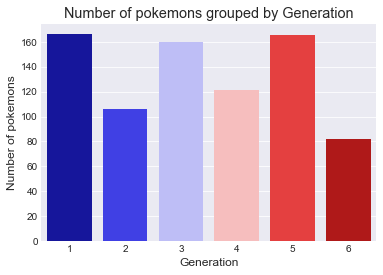

In [72]:
# ploting numbers of pokemons for each generation

sns.countplot(x = 'Generation', data = pokemons, palette = 'seismic')
plt.title('Number of pokemons grouped by Generation')
plt.ylabel('Number of pokemons')

In [73]:
pokemons.groupby('Generation').sum()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,
1,12586,70851,10926,12722,11763,11922,11469,12049,6.0
2,21442,44338,7548,7635,7779,6990,7834,6552,5.0
3,51515,69796,10647,13060,11856,12129,11396,10708,18.0
4,53536,55541,8843,10027,9454,9245,9340,8632,13.0
5,94755,71773,11845,13541,11934,11878,11342,11233,15.0
6,56417,35783,5598,6216,6288,6092,6141,5448,8.0


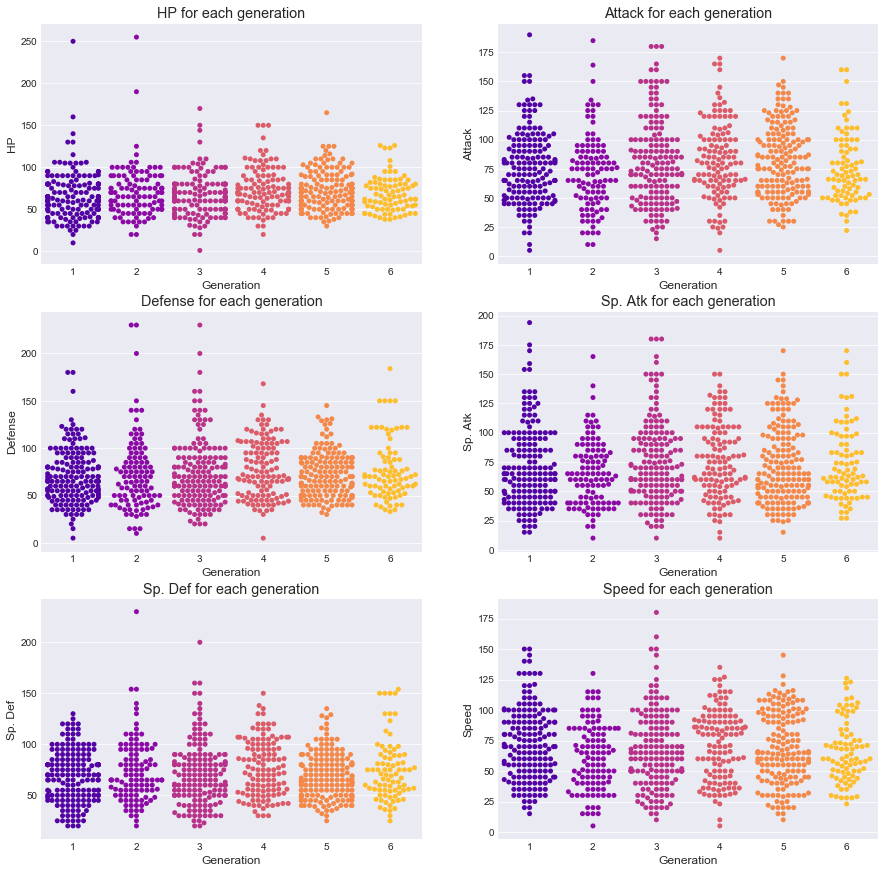

In [75]:
plt.figure(figsize = (15, 15))
k = 1
for i in stats:
    plt.subplot(3,2,k)
    x = sns.swarmplot(x = 'Generation', y = i, data = pokemons, palette = 'plasma')
    k = k + 1
    plt.title(i+str(' for each generation'))

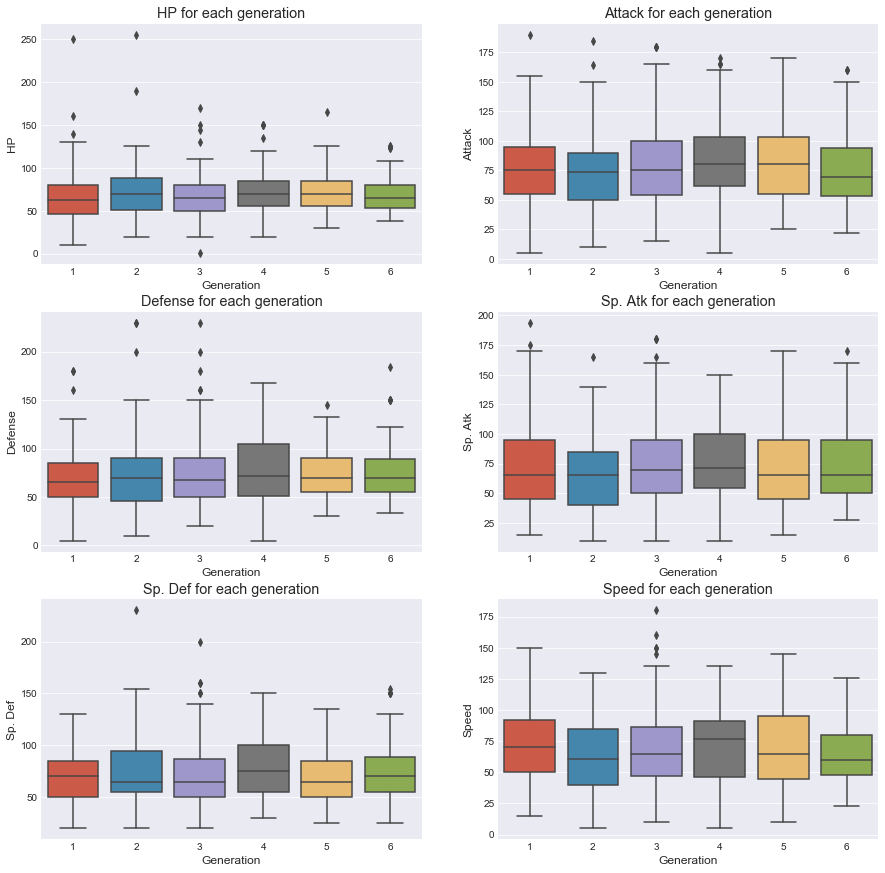

In [76]:
plt.figure(figsize = (15, 15))
k = 1
for i in stats:
    plt.subplot(3,2,k)
    sns.boxplot(y = pokemons[i], x=pokemons.Generation)
    k = k + 1
    plt.title(i+str(' for each generation'))

In [84]:
# How many legendary pokemons are in total?

print('Number of Legendary pokemons ',len(pokemons[pokemons.Legendary == True]))
print('Percentage of Legendary pokemons', (len(pokemons[pokemons.Legendary == True])/len(pokemons))*100)
# there are 65 Legendary pokemons
# 8.125% pokemons are Legendary

Number of Legendary pokemons  65
Percentage of Legendary pokemons 8.125


In [85]:
pokemons.groupby('Generation').sum().Legendary
#Generation 3, 5 & 4 have most legendary pokemons

Generation
1     6.0
2     5.0
3    18.0
4    13.0
5    15.0
6     8.0
Name: Legendary, dtype: float64

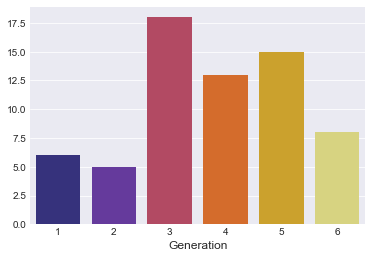

In [88]:
sns.barplot(x = pokemons.groupby('Generation').sum().Legendary.index,
            y = pokemons.groupby('Generation').sum().Legendary.values, palette= 'CMRmap')

In [89]:
# How many Legendary pokemons are in each type?

pokemons.groupby('Type').sum().Legendary.sort_values(ascending = False)


Type
Psychic     14.0
Dragon      12.0
Fire         5.0
Water        4.0
Rock         4.0
Electric     4.0
Ground       4.0
Steel        4.0
Grass        3.0
Dark         2.0
Ghost        2.0
Flying       2.0
Ice          2.0
Normal       2.0
Fairy        1.0
Fighting     0.0
Poison       0.0
Bug          0.0
Name: Legendary, dtype: float64

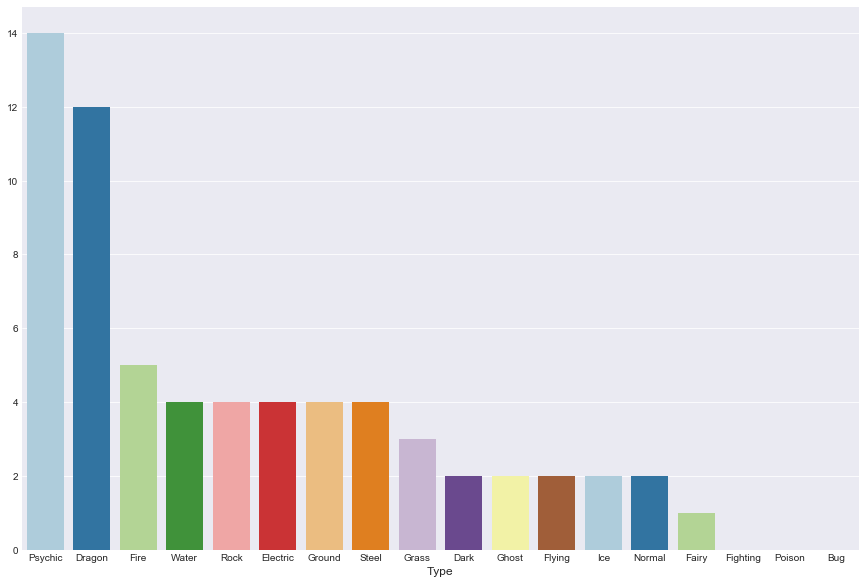

In [90]:
plt.figure(figsize = (15,10))
sns.barplot(x = pokemons.groupby('Type').sum().Legendary.sort_values(ascending = False).index,
            y = pokemons.groupby('Type').sum().Legendary.sort_values(ascending = False).values, palette = 'Paired')

In [ ]:
# How the stats of Legendary pokemons compared to the otheres?

# In [49]
